In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [3]:
%%time
import gzip

path = 'data/Cell_Phones_and_Accessories_5.json.gz'
path_meta = 'data/meta_Cell_Phones_and_Accessories.json.gz'

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

k_core2018 = getDF(path)
k_core2018_meta = getDF(path_meta)

CPU times: total: 55.5 s
Wall time: 58.3 s


In [4]:
print(k_core2018.shape)
print(k_core2018_meta.shape)

(1128437, 12)
(590071, 19)


In [5]:
k_core2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         1128437 non-null  float64
 1   verified        1128437 non-null  bool   
 2   reviewTime      1128437 non-null  object 
 3   reviewerID      1128437 non-null  object 
 4   asin            1128437 non-null  object 
 5   style           605241 non-null   object 
 6   reviewerName    1128302 non-null  object 
 7   reviewText      1127672 non-null  object 
 8   summary         1127920 non-null  object 
 9   unixReviewTime  1128437 non-null  int64  
 10  vote            92034 non-null    object 
 11  image           27107 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 104.4+ MB


In [6]:
k_core2018_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590071 entries, 0 to 590070
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         590071 non-null  object
 1   tech1            590071 non-null  object
 2   description      590071 non-null  object
 3   fit              590071 non-null  object
 4   title            590071 non-null  object
 5   also_buy         590071 non-null  object
 6   tech2            590071 non-null  object
 7   brand            590071 non-null  object
 8   feature          590071 non-null  object
 9   rank             590071 non-null  object
 10  also_view        590071 non-null  object
 11  details          590071 non-null  object
 12  main_cat         590071 non-null  object
 13  similar_item     590071 non-null  object
 14  date             590071 non-null  object
 15  price            590071 non-null  object
 16  asin             590071 non-null  object
 17  imageURL       

In [7]:
main_cat_value_counts = k_core2018_meta['main_cat'].value_counts()

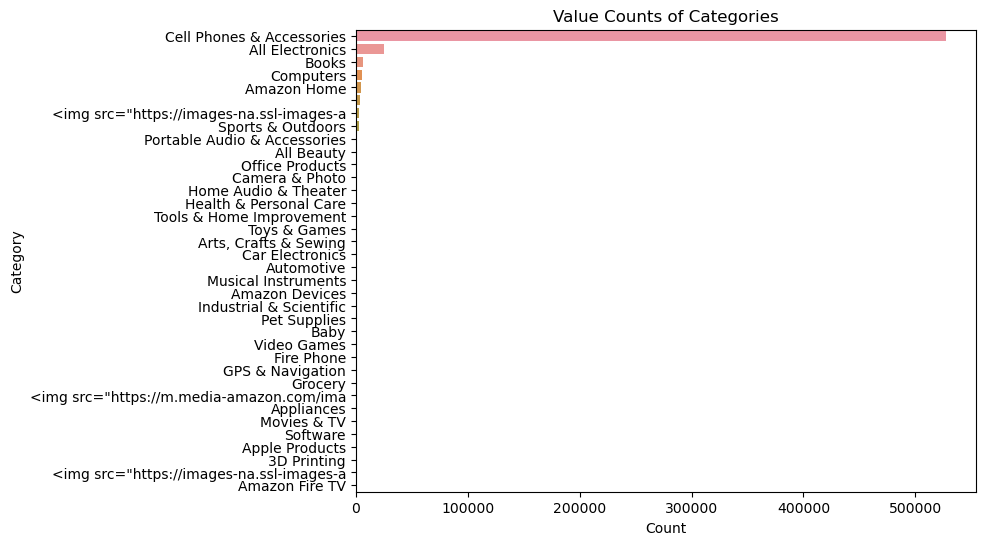

In [8]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=main_cat_value_counts.values, y=main_cat_value_counts.index, orient='h')
plt.title('Value Counts of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
# Set maximum label length
max_label_length = 40  # Adjust this value as needed
labels = [label[:max_label_length] if len(label) > max_label_length else label for label in main_cat_value_counts.index]
plt.yticks(range(len(main_cat_value_counts.index)), labels)
plt.show()

In [9]:
k_core2018.head(20)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN
5,2.0,True,"01 27, 2014",A1DW2L6XCC5TJS,7508492919,NaN,Amazon Customer,The product looked exactly like the picture an...,Not so happy,1390780800,NaN,NaN
6,3.0,True,"01 23, 2014",AQC61R4UST7UH,7508492919,NaN,DaMara Estep,I FINALLY got my case today. It took forever t...,It's cute!,1390435200,NaN,NaN
7,5.0,True,"01 17, 2014",A31OVFL91BCKXG,7508492919,NaN,Ashley Nicole Miller,It is a very cute case. None of the jewels hav...,Cute case,1389916800,NaN,NaN
8,1.0,True,"12 27, 2013",A1K0VLK6O5Z22M,7508492919,NaN,BeeLove21,DO NOT BUY! this item is seriously cheap as he...,WORST ITEM!,1388102400,NaN,NaN
9,4.0,True,"12 16, 2013",A1K3BWU73YB44P,7508492919,NaN,Mrs. Ochoa,I really love this case... you have to keep yo...,Pretty Cute!,1387152000,NaN,NaN


In [10]:
k_core2018_meta[k_core2018_meta['asin'] == '7508492919']

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
14,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[, Elegani Butterfly Case 3D Pattern Back Cove...",,MinisDesign 3d Bling Crystal Bow Transparent C...,[],,ELEGANI,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,7508492919,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [11]:
(k_core2018_meta.head())

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164,[],[]
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X,[],[]
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240,[],[]
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710,[],[]
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273,[],[]


In [12]:
merged_df = pd.merge(k_core2018, k_core2018_meta, on='asin')
print(merged_df.shape)
print(merged_df.info()) 

(1129035, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129035 entries, 0 to 1129034
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   overall          1129035 non-null  float64
 1   verified         1129035 non-null  bool   
 2   reviewTime       1129035 non-null  object 
 3   reviewerID       1129035 non-null  object 
 4   asin             1129035 non-null  object 
 5   style            605459 non-null   object 
 6   reviewerName     1128900 non-null  object 
 7   reviewText       1128270 non-null  object 
 8   summary          1128518 non-null  object 
 9   unixReviewTime   1129035 non-null  int64  
 10  vote             92176 non-null    object 
 11  image            27106 non-null    object 
 12  category         1129035 non-null  object 
 13  tech1            1129035 non-null  object 
 14  description      1129035 non-null  object 
 15  fit              1129035 non-null  object 
 16  titl

In [13]:
# Select specific columns
selected_columns = ['overall', 'reviewText', 'category', 'description', 'title', 'brand', 'feature', 'details', 'main_cat', 'price', 'asin']
merged_df = merged_df[selected_columns]

In [14]:
len(merged_df['asin'].unique())

48172

In [15]:
merged_df.head(30)

,overall,reviewText,category,description,title,brand,feature,details,main_cat,price,asin
0,5.0,Looks even better in person. Be careful to not...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
1,5.0,When you don't want to spend a whole lot of ca...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
2,3.0,"so the case came on time, i love the design. I...","[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
4,4.0,"I liked it because it was cute, but the studs ...","[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
5,2.0,The product looked exactly like the picture an...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
6,3.0,I FINALLY got my case today. It took forever t...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
7,5.0,It is a very cute case. None of the jewels hav...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
8,1.0,DO NOT BUY! this item is seriously cheap as he...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919
9,4.0,I really love this case... you have to keep yo...,"[Cell Phones & Accessories, Cases, Holsters & ...","[, Elegani Butterfly Case 3D Pattern Back Cove...",MinisDesign 3d Bling Crystal Bow Transparent C...,ELEGANI,[Fashionable with unique 3D butterfly design f...,{},Cell Phones & Accessories,,7508492919


come ottengo solo le reviews di cellulari???
Andando a filtrare la categoria, selezionando solo ['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']

In [16]:
categories_counts = merged_df['category'].value_counts()

In [17]:
categories_counts = merged_df['category'].value_counts().reset_index()
categories_counts.columns = ['category', 'count']
#categories_counts
#categories_counts.to_csv('categories_counts.csv', index = False) 

In [18]:
#merged_df[merged_df['category'] == ['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']]
condition = merged_df['category'].isin([['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']])
print(merged_df['category'].isin([['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']]).value_counts())


category
False    1081041
True       47994
Name: count, dtype: int64


In [19]:
cell_phones_only = merged_df[merged_df['category'].isin([['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']])]
cell_phones_only

,overall,reviewText,category,description,title,brand,feature,details,main_cat,price,asin
848,1.0,I had been very happy with my Motorola phone u...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
849,1.0,I had been very happy with my Motorola phone u...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
850,3.0,I don't own this phone. I own the cheaper Moto...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
851,3.0,I don't own this phone. I own the cheaper Moto...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
852,4.0,Great phone by Motorola - leaps and bounds ove...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
...,...,...,...,...,...,...,...,...,...,...,...
1128462,1.0,This phone is no good!! Keeps freezing up. Eve...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[iPhone with iOS 9; Lightning to USB Cable; US...,"Apple iPhone SE, GSM Unlocked, 16 GB - Space G...",Apple,[Renewed products look and work like new. Thes...,{},Cell Phones & Accessories,$40.08,B01GXAT0BK
1128499,5.0,Price,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],"Unlocked Cell Phones, DOOGEE Mix 4G Unlocked S...",DOOGEE,"[4G NETWROK, SMOOTH CONNECTION - Support : 2G:...",{},Cell Phones & Accessories,$27.57,B01GYLZG6G
1128699,5.0,Awesome thanks love it,"[Cell Phones & Accessories, Cell Phones, Unloc...",[Meet the Newest Member of the Note Family - G...,Samsung Galaxy Note 4 N910T 32GB 4G LTE T-Mobi...,Samsung,[Only select sellers who maintain a high perfo...,{},Cell Phones & Accessories,,B01H42CNDI
1128859,5.0,Work fantastic. I haven't had any issues with ...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[The Samsung Galaxy S7 active Smartphone runs ...,Samsung Galaxy S7 Active SM-G891A 32GB Sandy G...,Samsung,[5.1 inch Super AMOLED capacitive touchscreen ...,{},Cell Phones & Accessories,$96.64,B01H93TCCM


Quanti prodotti singoli ci sono?

In [28]:
len(cell_phones_only['asin'].unique())

1697

Quali sono i brand di cellulari più frequenti?

In [20]:
cell_phones_only['brand'].value_counts()

brand
Samsung                                    11351
BLU                                         9168
Motorola                                    3934
Apple                                       3585
BlackBerry                                  3521
                                           ...  
Hipipooo                                       5
Quality Technology Industrial Co., ltd.        5
Doro                                           5
Visikey                                        5
Moonar                                         5
Name: count, Length: 130, dtype: int64

In [21]:
cell_phones_brand_counts = cell_phones_only['brand'].value_counts().reset_index()
cell_phones_brand_counts.columns = ['brand', 'count']
cell_phones_brand_counts.to_csv('data/brand_counts.csv', index = False) 

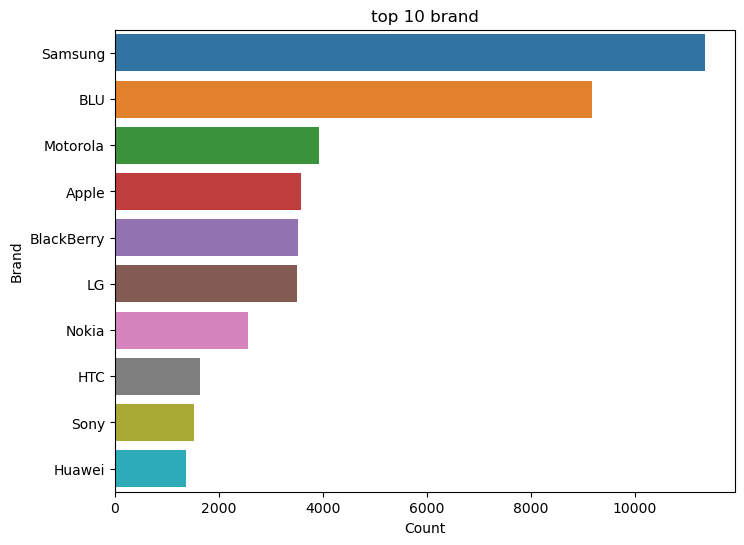

In [22]:
#select top 10 brand
cell_phones_brand_counts = cell_phones_brand_counts[:10]
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x = cell_phones_brand_counts['count'], y = cell_phones_brand_counts['brand'], orient='h')
plt.title('top 10 brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

In [23]:
top10_brand_list = cell_phones_brand_counts['brand']
cell_phones_top10_brand = cell_phones_only[cell_phones_only['brand'].isin(top10_brand_list)]
cell_phones_top10_brand

,overall,reviewText,category,description,title,brand,feature,details,main_cat,price,asin
848,1.0,I had been very happy with my Motorola phone u...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
849,1.0,I had been very happy with my Motorola phone u...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
850,3.0,I don't own this phone. I own the cheaper Moto...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
851,3.0,I don't own this phone. I own the cheaper Moto...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
852,4.0,Great phone by Motorola - leaps and bounds ove...,"[Cell Phones & Accessories, Cell Phones, Unloc...","[used,good,with charger,one of the first in a ...",Motorola i730 Phone (Nextel),Motorola,"[The Motorola i730's advanced features, includ...",{},Cell Phones & Accessories,,B0000SX3BK
...,...,...,...,...,...,...,...,...,...,...,...
1128453,4.0,does funny things rarely . like FB will just r...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[The energy XL is a stunning smartphone that p...,"BLU ENERGY XL - 5,000mAh Super Battery - LTE S...",BLU,"[Super 5,000mAh Massive Battery. OTG capabilit...",{},Cell Phones & Accessories,$224.96,B01GWUXN5K
1128454,5.0,Not bad phone,"[Cell Phones & Accessories, Cell Phones, Unloc...",[The energy XL is a stunning smartphone that p...,"BLU ENERGY XL - 5,000mAh Super Battery - LTE S...",BLU,"[Super 5,000mAh Massive Battery. OTG capabilit...",{},Cell Phones & Accessories,$224.96,B01GWUXN5K
1128462,1.0,This phone is no good!! Keeps freezing up. Eve...,"[Cell Phones & Accessories, Cell Phones, Unloc...",[iPhone with iOS 9; Lightning to USB Cable; US...,"Apple iPhone SE, GSM Unlocked, 16 GB - Space G...",Apple,[Renewed products look and work like new. Thes...,{},Cell Phones & Accessories,$40.08,B01GXAT0BK
1128699,5.0,Awesome thanks love it,"[Cell Phones & Accessories, Cell Phones, Unloc...",[Meet the Newest Member of the Note Family - G...,Samsung Galaxy Note 4 N910T 32GB 4G LTE T-Mobi...,Samsung,[Only select sellers who maintain a high perfo...,{},Cell Phones & Accessories,,B01H42CNDI


In [24]:
cell_phones_top10_brand.isnull().sum()

overall         0
reviewText     23
category        0
description     0
title           0
brand           0
feature         0
details         0
main_cat        0
price           0
asin            0
dtype: int64

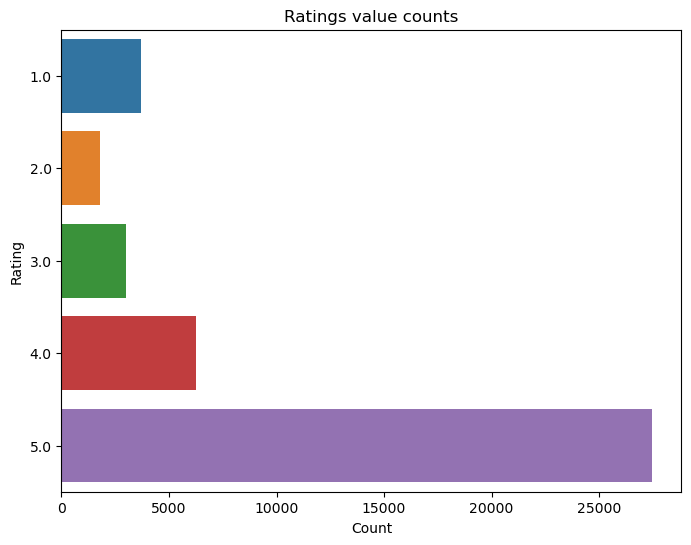

overall
5.0    27447
4.0     6245
1.0     3680
3.0     3004
2.0     1794
Name: count, dtype: int64


In [25]:
ratings = cell_phones_top10_brand['overall'].value_counts()

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=ratings.values, y=ratings.index, orient='h')
plt.title('Ratings value counts')
plt.xlabel('Count')
plt.ylabel('Rating')

plt.show()
print(ratings)

In [26]:
cell_phones_top10_brand = cell_phones_top10_brand.drop(columns = ['category', 'title', 'main_cat', 'details'])


In [27]:
cell_phones_top10_brand.to_csv('data/cell_phones_reviews.csv', index = False)